In [10]:
PATH = '/Users/jim'
import sys
sys.path.append(PATH)

PATH = '/Users/jim/meteocpy'
import sys
sys.path.append(PATH)

import meteocpy as mpy
import meteocpy.forward as forward
from meteocpy.forward import apex
from meteocpy.utils import load_params, BiDict, plot_frame
from meteocpy.calibration.utils_calibrate import gather_simulations

import numpy as np
import torch

import os
import matplotlib.pyplot as plt
import pickle as pkl

In [21]:
# load simulation
simu_path = '/Users/jim/meteocpy/simulations/test'

# load simulation
with open(os.path.join(simu_path, 'frames'), 'rb') as f:
    frames = pkl.load(f)

with open(os.path.join(simu_path, 'band_indices'), 'rb') as f:
    illu_bands = pkl.load(f)

with open(os.path.join(simu_path, 'simulation_config'), 'rb') as f:
    config = pkl.load(f)

with open(os.path.join('/Users/jim/meteocpy', 'saved_apex_models', 'apex_400_2000'), 'rb') as f:
    ap = pkl.load(f)

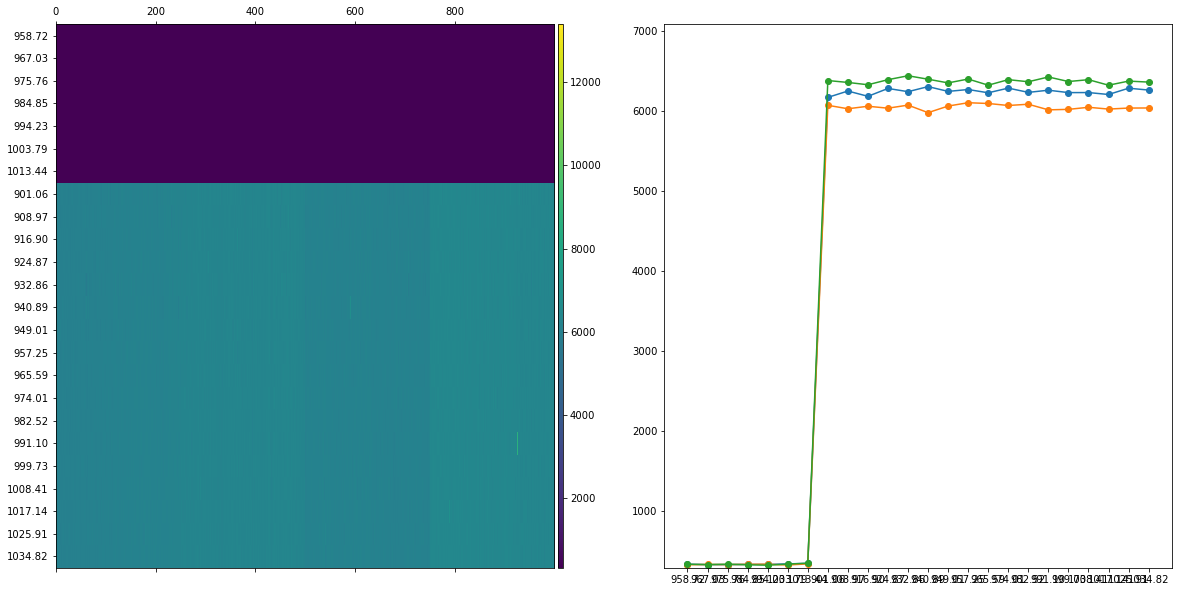

In [4]:
%matplotlib inline
plot_frame(ap, frames, illu_bands, -1, channel=0, figsize=(20, 10))

In [22]:
band_dict, wvl_dict = gather_simulations(frames, illu_bands, config['inp_wvlens'].reshape(-1))

In [26]:
len(frames)

3720

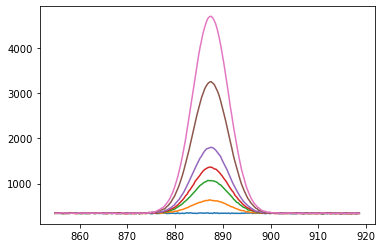

In [9]:
%matplotlib inline
band = 100
px = 200

plt.figure()
for channel in range(frames[0].shape[0]):
    a = plt.plot(wvl_dict[band], np.concatenate([band_dict[band]], axis=0)[:, channel, px])
plt.show()

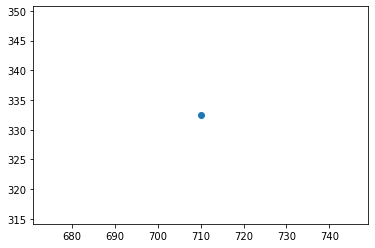

In [26]:
plt.scatter(wvl_dict[60], np.concatenate([band_dict[60]], axis=0)[:, 0, px])

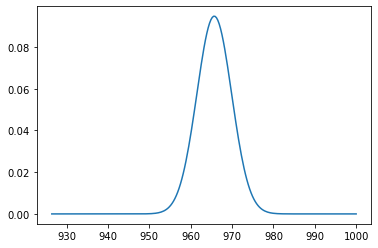

In [30]:
%matplotlib inline
band_ind = -9
plt.plot(ap.model.binned.wvls[band_ind], ap.model.binned.srfs[band_ind][0, 500, :])
plt.show()

(234, 7, 1000)

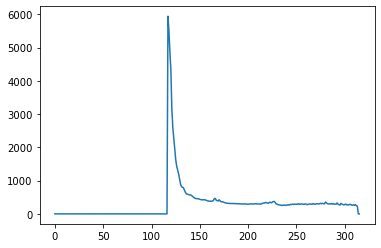

In [51]:
np.concatenate([band_dict[230]], axis=0).shape

<IPython.core.display.Javascript object>


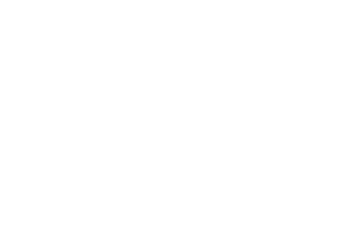

ValueError: x and y must have same first dimension, but have shapes (4170,) and (1, 4170)

<IPython.core.display.Javascript object>


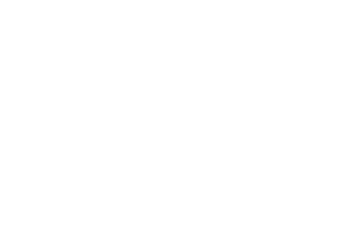

In [6]:
%matplotlib notebook
plt.plot(config['inp_wvlens'].reshape(-1), config['inp_spectrum'][:, 0])

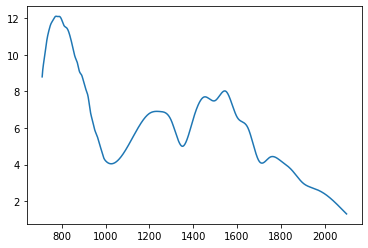

In [17]:
%matplotlib inline
a = plt.plot(config['inp_wvlens'], config['inp_spectrum'][0, 0, :])

In [15]:
config['inp_spectrum'].shape

(1, 7, 4170)